In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('C:\\Users\\moham\\Desktop\\autres\\yessine\\Projects\\3ATA\\H!ckathon\\Final_Sprint\\X_train_Hi5.csv')

In [3]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_percentage = df.isnull().mean() * 100

# Afficher les colonnes avec plus de 40 % de valeurs manquantes
cols_to_drop = missing_percentage[missing_percentage > 40].index
print(f"Colonnes à supprimer (plus de 40 % de valeurs manquantes) :\n{cols_to_drop.tolist()}")

Colonnes à supprimer (plus de 40 % de valeurs manquantes) :
['meteo_DRR', 'meteo_temperature_min_ground', 'meteo_temperature_min_50cm', 'meteo_pressure_avg', 'meteo_pression_maxi', 'meteo_wind_speed_avg_10m', 'meteo_wind_max', 'meteo_wind_direction_max_inst', 'meteo_time_wind_max', 'meteo_wind_avg', 'meteo_wind_direction_max_avg', 'meteo_time_wind_avg', 'meteo_wind_speed_avg_2m', 'meteo_wind_max_2m', 'meteo_wind_direction_max_inst_2m', 'meteo_time_wind_max_2m', 'meteo_wind_max_3s', 'meteo_time_wind_max_3s', 'meteo_humidity_min', 'meteo_time_humidity_min', 'meteo_humidity_max', 'meteo_time_humidity_max', 'meteo_humidity_duration_below_40%', 'meteo_humidity_duration_above_80%', 'meteo__pressure_saturation_avg', 'meteo_wetting_duration', 'meteo_humidity_avg', 'meteo_sunshine_duration', 'meteo_radiation', 'meteo_radiation_direct', 'meteo_sunshine_%', 'meteo_radiation_IR', 'meteo_radiation_UV_max', 'meteo_cloudiness', 'meteo_cloudiness_height', 'meteo_if_snow', 'meteo_if_fog', 'meteo_if_thu

In [49]:
# Supprimer ces colonnes
df_cleaned = df.drop(columns=cols_to_drop)

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 84


In [51]:
# Supprimer les colonnes contenant "date" dans leur nom
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('date')]

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 80


In [52]:
# Supprimer les colonnes contenant "name" dans leur nom
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('name', case=False)]

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 74


In [53]:
# Supprimer les colonnes contenant "label" dans leur nom
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('label', case=False)]

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 64


In [54]:
# Supprimer les colonnes contenant "label" dans leur nom
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('code', case=False)]

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 46


In [55]:
# Supprimer les colonnes contenant "label" dans leur nom
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('id', case=False)]

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 43


In [56]:
# Supprimer les colonnes contenant "label" dans leur nom
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('mode', case=False)]

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 42


In [ ]:
# Remplir les valeurs manquantes des variables continues
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    if 'temperature' in col or 'wind' in col or 'humidity' in col:
        df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Remplir les valeurs manquantes des booléens ou catégoriques
for col in df_cleaned.select_dtypes(include=['bool', 'object']).columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

In [13]:
print(df_cleaned.isnull().sum().sum())  # Nombre total de valeurs manquantes

0


In [39]:
object_columns = df_cleaned.select_dtypes(include=['object']).columns
print(object_columns)

Index(['piezo_status', 'piezo_qualification', 'hydro_hydro_quantity_elab',
       'insee_%_agri', 'insee_med_living_level', 'insee_%_ind',
       'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object')


In [17]:
df_cleaned.sample(4)

,row_index,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_status,piezo_qualification,meteo_latitude,meteo_longitude,meteo_altitude,...,prelev_latitude_0,prelev_volume_1,prelev_longitude_1,prelev_latitude_1,prelev_volume_2,prelev_longitude_2,prelev_latitude_2,prelev_other_volume_sum,insee_pop_commune,piezo_groundwater_level_category
2557480,3009273,38.2,198.00,0.816238,48.700276,2,0,0.959333,48.712167,157,...,46.558668,2.323468e+06,1.600917,46.608652,1413261.0,1.581543,46.624934,17159626.0,136.0,2
1030383,1083849,73.2,140.00,1.455877,49.283078,2,0,1.412833,49.244667,16,...,49.310239,1.617406e+10,1.387721,49.169179,1095738.0,1.534922,49.082002,12054088.0,1229.0,1
1383879,1455503,64.0,107.47,0.430879,43.804392,2,0,0.372833,43.842500,120,...,43.843105,9.475010e+05,0.385205,43.736793,946691.0,0.362553,43.965334,9099670.0,1039.0,3
2175423,2285706,49.1,27.50,-0.078067,47.259053,1,0,-0.074333,47.252167,69,...,47.399854,2.909962e+06,-0.092213,47.264533,893959.0,-0.267168,47.342411,21219673.0,26215.0,3


In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830316 entries, 0 to 2830315
Data columns (total 42 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   row_index                          int64  
 1   piezo_station_investigation_depth  float64
 2   piezo_station_altitude             float64
 3   piezo_station_longitude            float64
 4   piezo_station_latitude             float64
 5   piezo_status                       object 
 6   piezo_qualification                object 
 7   meteo_latitude                     float64
 8   meteo_longitude                    float64
 9   meteo_altitude                     int64  
 10  meteo_rain_height                  float64
 11  meteo_temperature_min              float64
 12  meteo_time_tn                      float64
 13  meteo_temperature_max              float64
 14  meteo_time_tx                      float64
 15  meteo_temperature_avg              float64
 16  meteo_temperature_

In [38]:
unique_values = df_cleaned[object_columns].nunique()
print(unique_values)

piezo_status                          4
piezo_qualification                   4
hydro_hydro_quantity_elab             2
insee_%_agri                        367
insee_med_living_level              925
insee_%_ind                         510
insee_%_const                       408
piezo_groundwater_level_category      5
dtype: int64


In [58]:
columns_to_remove = ['insee_%_agri', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const']
df_cleaned.drop(columns=columns_to_remove, inplace=True)

# Vérification
print(f"Nombre de colonnes après suppression : {df_cleaned.shape[1]}")

Nombre de colonnes après suppression : 38


In [59]:
df_cleaned.drop(columns=['row_index'], inplace=True)

# Verification
print(f"Nouveau nombre de colonnes : {df_cleaned.shape[1]}")

Nouveau nombre de colonnes : 37


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
# Encodage des variables catégoriques
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le

In [61]:
# Division des données en caractéristiques (X) et cible (y)
X = df_cleaned.drop('piezo_groundwater_level_category', axis=1)
y = df_cleaned['piezo_groundwater_level_category']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.naive_bayes import GaussianNB

# Modèle Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Évaluation Naive Bayes
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")

Naive Bayes Metrics:
Accuracy: 0.1984
Precision: 0.2421
Recall: 0.1984
F1 Score: 0.1356


In [40]:
from sklearn.linear_model import LogisticRegression

# Modèle Régression Logistique (Softmax)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Évaluation Régression Logistique
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Metrics:
Accuracy: 0.2540
Precision: 0.2588
Recall: 0.2540
F1 Score: 0.2388


In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Évaluation KNN
print("\nKNN Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}")


KNN Metrics:
Accuracy: 0.5374
Precision: 0.5434
Recall: 0.5374
F1 Score: 0.5391


In [51]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Évaluation Random Forest
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")


Random Forest Metrics:
Accuracy: 0.9088
Precision: 0.9091
Recall: 0.9088
F1 Score: 0.9089


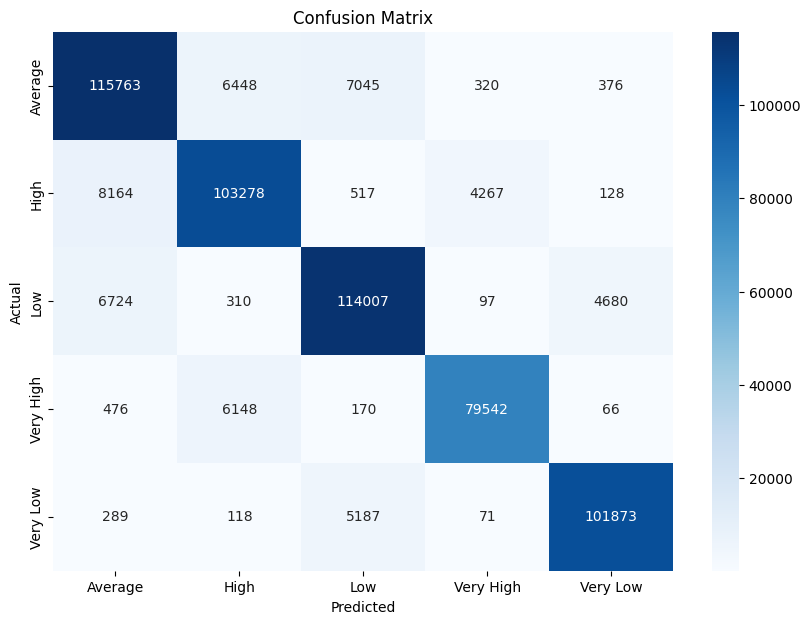

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[col].classes_, yticklabels=label_encoders[col].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
import xgboost as xgb

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Specify multiclass classification
    'num_class': len(y.unique()),  # Number of classes
    'eval_metric': 'merror',     # Evaluation metric
    'max_depth': 10,                # Maximum depth of a tree
    'eta': 0.3,                    # Learning rate
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 150
bst = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred_xgb = bst.predict(dtest)

# Evaluate the model
print("\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")


XGBoost Metrics:
Accuracy: 0.7525
Precision: 0.7529
Recall: 0.7525
F1 Score: 0.7526


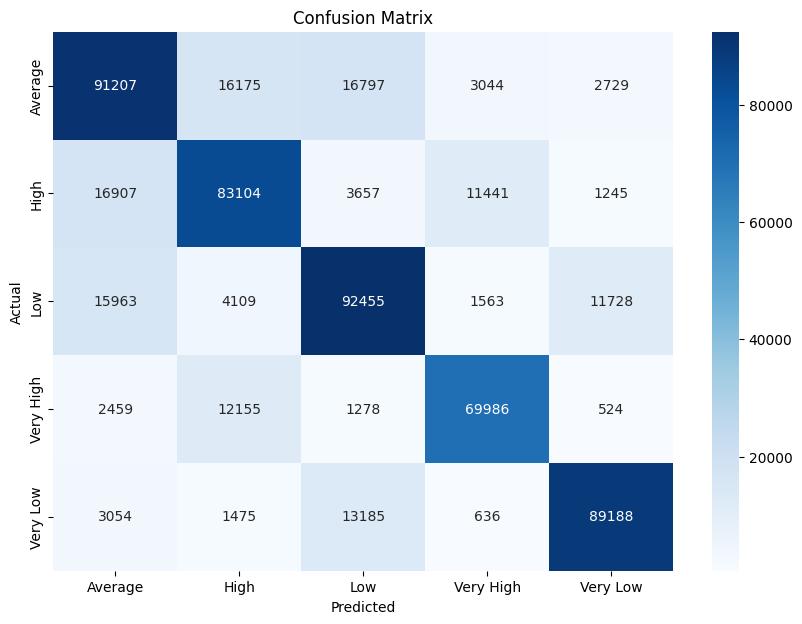

In [63]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_xgb)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[col].classes_, yticklabels=label_encoders[col].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

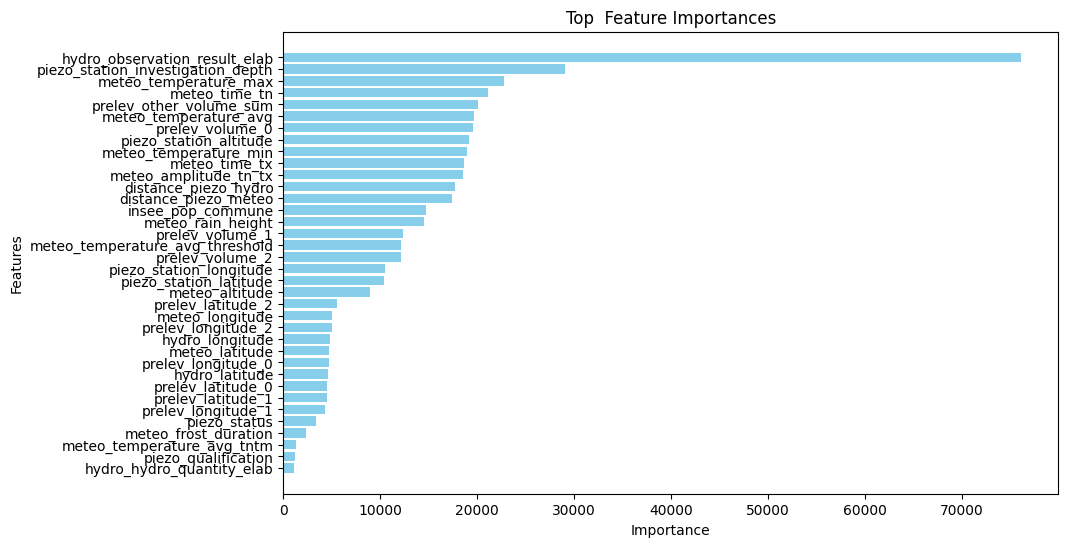

In [72]:
# Extraire les noms des features depuis X
feature_names = X.columns.tolist()  # Si X est un DataFrame pandas

# Extraire l'importance des features avec les noms associés
importance = bst.get_score(importance_type='weight')
importance_named = {
    feature_names[int(k.replace('f', ''))]: v for k, v in importance.items()
}

# Trier les features par importance et limiter aux 15 premiers
sorted_importance = sorted(importance_named.items(), key=lambda x: x[1], reverse=True)

# Séparer les noms des features et leurs scores
features, scores = zip(*sorted_importance)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top  Feature Importances")
plt.gca().invert_yaxis()  # Pour afficher les features les plus importants en haut
plt.show()